# Create Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import glob
from tensorflow import keras
import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

2024-04-22 17:29:40.606668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#load the model
model = keras.models.load_model("/share/jcorner_data/models/future_modes_v2.h5")

In [3]:
#load, normalize, and change data to categorical
with open("/share/jcorner_data/pkls/new_mode_svrimg/svrimg_new_mode_test.pkl", "rb") as f:
    (x_test, y_test) = pickle.load(f)
x_test = x_test.astype("float32") / 80
y_test = keras.utils.to_categorical(y_test, 4)

29/29 [==============================] - 9s 307ms/step
Confusion Matrix
[[135   7   0   0]
 [  8 135   4   4]
 [  0   3 505   6]
 [  0   1   0 112]]
Classification Report
              precision    recall  f1-score   support

    Cellular       0.94      0.95      0.95       142
  Mixed Mode       0.92      0.89      0.91       151
      Linear       0.99      0.98      0.99       514
       Other       0.92      0.99      0.95       113

    accuracy                           0.96       920
   macro avg       0.94      0.95      0.95       920
weighted avg       0.96      0.96      0.96       920



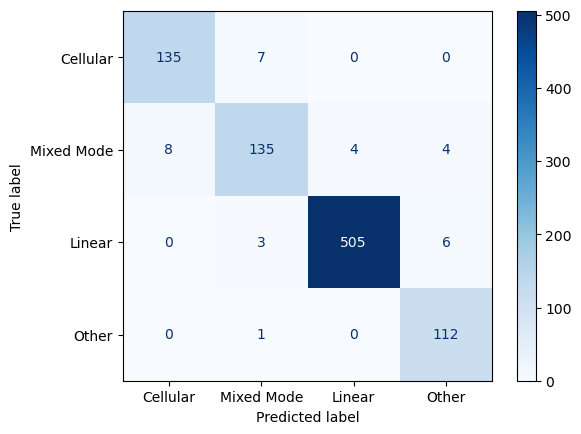

In [4]:
#test the data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

#create the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test_, y_pred))
print('Classification Report')
target_names = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
print(classification_report(y_test_, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_, y_pred), display_labels=target_names)
disp.plot(cmap='Blues')